# Introduction
The Association of Zoos and Aquariums (AZA) is a non-profit, independent accrediting organization representing more than 250 facilities in the United States and internationally. These facilities may participate in the AZA’s cooperatively managed Species Survival Plan (SSP) programs, which aim to manage a species’ ex situ (meaning “outside of its natural habitat” - e.g. in zoos) population. 

The International Union for Conservation of Nature (IUCN), composed of both governmental and non-governmental organizations, is the global authority on the status of the natural world. The IUCN’s Red List of Threatened Species is the world’s most comprehensive source of information on the global extinction risk status of animal, fungus, and plant species. Evaluated species are classified into one of eight categories: 
- Extinct (EX)
- Extinct in the Wild (EW)
- Critically Endangered (CR)
- Endangered (EN)
- Vulnerable (VU)
- Near Threatened (NT)
- Least Concern (LC)
- Data Deficient (DD)

This project aims to analyze animal species with dedicated AZA SSPs and their IUCN Red List global extinction risk statuses to determine if SSPs prioritize the world’s most vulnerable species. 

# Load Data


SSP dataset created with data retrieved from the Association of Zoos and Aquariums' Animal Program Database. 

AZA. 2024. Animal Program Database. https://www.aza.org.

In [343]:
# Python library for data manipulation and analysis
import pandas as pd
# Read in SSP data and display first five rows
ssp = pd.read_csv('0225_aza_ssp.csv')
ssp.head

<bound method NDFrame.head of     program_type    taxon                 common_name    genus_name  \
0            SSP   Mammal                    Aardvark   Orycteropus   
1            SSP   Mammal                       Addax         Addax   
2            SSP   Mammal           Agouti, Brazilian    Dasyprocta   
3            SSP  Reptile          Alligator, Chinese     Alligator   
4            SSP   Mammal             Anteater, Giant  Myrmecophaga   
..           ...      ...                         ...           ...   
280          SSP   Mammal                 Wolf, Maned    Chrysocyon   
281          SSP     Bird           Woodhoopoe, Green   Phoeniculus   
282          SSP   Mammal              Zebra, Grevy's         Equus   
283          SSP   Mammal  Zebra, Hartmann's Mountain        Equus    
284          SSP   Mammal               Zebra, Plains         Equus   

      species_name          scientific_name  subspecies  
0             afer         Orycteropus afer         NaN  
1

Red List dataset created with data retrieved from the International Union for Conservation of Nature's Red List of Threatened Species. 

IUCN. 2024. The IUCN Red List of Threatened Species. Version 2024-2. https://www.iucnredlist.org.

In [344]:
# Read in Red List data and display first five rows
redlist = pd.read_csv('0225_iucn_assessments.csv')
redlist.head

<bound method NDFrame.head of        taxon                 common_name    genus_name   species_name  \
0     Mammal                    Aardvark   Orycteropus           afer   
1     Mammal                       Addax         Addax  nasomaculatus   
2     Mammal           Agouti, Brazilian    Dasyprocta       leporina   
3    Reptile          Alligator, Chinese     Alligator       sinensis   
4     Mammal             Anteater, Giant  Myrmecophaga     tridactyla   
..       ...                         ...           ...            ...   
280   Mammal                 Wolf, Maned    Chrysocyon     brachyurus   
281     Bird           Woodhoopoe, Green   Phoeniculus      purpureus   
282   Mammal              Zebra, Grevy's         Equus         grevyi   
283   Mammal  Zebra, Hartmann's Mountain         Equus          zebra   
284   Mammal               Zebra, Plains         Equus         quagga   

             scientific_name assessment population_trend assessment_scope  
0           Oryct

# Clean and Merge Data

In [345]:
# Check for dtype errors
print(redlist.dtypes, ssp.dtypes)

taxon               object
common_name         object
genus_name          object
species_name        object
scientific_name     object
assessment          object
population_trend    object
assessment_scope    object
dtype: object program_type       object
taxon              object
common_name        object
genus_name         object
species_name       object
scientific_name    object
subspecies         object
dtype: object


In [346]:
# Drop unneeded SSP columns and display first 5 rows
ssp.drop(
    ['program_type',
     'genus_name',
     'species_name',
     'subspecies'],
    axis=1, inplace=True)
# Display first 5 rows
ssp.head

<bound method NDFrame.head of        taxon                 common_name          scientific_name
0     Mammal                    Aardvark         Orycteropus afer
1     Mammal                       Addax      Addax nasomaculatus
2     Mammal           Agouti, Brazilian      Dasyprocta leporina
3    Reptile          Alligator, Chinese       Alligator sinensis
4     Mammal             Anteater, Giant  Myrmecophaga tridactyla
..       ...                         ...                      ...
280   Mammal                 Wolf, Maned    Chrysocyon brachyurus
281     Bird           Woodhoopoe, Green    Phoeniculus purpureus
282   Mammal              Zebra, Grevy's             Equus grevyi
283   Mammal  Zebra, Hartmann's Mountain              Equus zebra
284   Mammal               Zebra, Plains             Equus quagga

[285 rows x 3 columns]>

In [347]:
# Drop unneeded RedList columns and display first 5 rows
redlist.drop(
    ['taxon',
     'common_name',
     'genus_name',
     'species_name',
     'assessment_scope'],
    axis=1, inplace=True)
# Display first 5 rows
redlist.head

<bound method NDFrame.head of              scientific_name assessment population_trend
0           Orycteropus afer         LC          Unknown
1        Addax nasomaculatus         CR       Decreasing
2        Dasyprocta leporina         LC           Stable
3         Alligator sinensis         CR           Stable
4    Myrmecophaga tridactyla         VU       Decreasing
..                       ...        ...              ...
280    Chrysocyon brachyurus         NT          Unknown
281    Phoeniculus purpureus         LC       Decreasing
282             Equus grevyi         EN           Stable
283              Equus zebra         VU       Increasing
284             Equus quagga         NT       Decreasing

[285 rows x 3 columns]>

In [348]:
# Check for null values
print(ssp.isnull().any())
print(redlist.isnull().any())

taxon              False
common_name        False
scientific_name    False
dtype: bool
scientific_name     False
assessment          False
population_trend    False
dtype: bool


In [349]:
# Combine data sets at column 'scientific_name' and display first 5 rows
redlist = redlist.set_index('scientific_name')
ssp = ssp.set_index('scientific_name')
ssp_vs_redlist = ssp.join(redlist, lsuffix='_SSP', rsuffix='_RL')
ssp_vs_redlist.head()

,taxon,common_name,assessment,population_trend
scientific_name,,,,
Orycteropus afer,Mammal,Aardvark,LC,Unknown
Addax nasomaculatus,Mammal,Addax,CR,Decreasing
Dasyprocta leporina,Mammal,"Agouti, Brazilian",LC,Stable
Alligator sinensis,Reptile,"Alligator, Chinese",CR,Stable
Myrmecophaga tridactyla,Mammal,"Anteater, Giant",VU,Decreasing


In [350]:
# Strip whitespace and normalize case in all columns 
ssp_vs_redlist['taxon'] = ssp_vs_redlist['taxon'].str.strip().str.upper()
ssp_vs_redlist['common_name'] = ssp_vs_redlist['common_name'].str.strip().str.upper()
ssp_vs_redlist['assessment'] = ssp_vs_redlist['assessment'].str.strip().str.upper()
ssp_vs_redlist['population_trend'] = ssp_vs_redlist['population_trend'].str.strip().str.upper()
# Display first 5 rows
ssp_vs_redlist.head()

,taxon,common_name,assessment,population_trend
scientific_name,,,,
Orycteropus afer,MAMMAL,AARDVARK,LC,UNKNOWN
Addax nasomaculatus,MAMMAL,ADDAX,CR,DECREASING
Dasyprocta leporina,MAMMAL,"AGOUTI, BRAZILIAN",LC,STABLE
Alligator sinensis,REPTILE,"ALLIGATOR, CHINESE",CR,STABLE
Myrmecophaga tridactyla,MAMMAL,"ANTEATER, GIANT",VU,DECREASING


In [351]:
print(ssp_vs_redlist.describe())
print (ssp_vs_redlist.info())

         taxon      common_name assessment population_trend
count      301              301        301              301
unique       5              285          6                5
top     MAMMAL  TIGER, SUMATRAN         LC       DECREASING
freq       129                3        133              199
<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, Orycteropus afer to Equus quagga
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   taxon             301 non-null    object
 1   common_name       301 non-null    object
 2   assessment        301 non-null    object
 3   population_trend  301 non-null    object
dtypes: object(4)
memory usage: 11.8+ KB
None


# Analysis

In [352]:
# Group ssp_vs_redlist by assessment
assessment_count = ssp_vs_redlist.groupby('assessment').assessment.count()
assessment_count = assessment_count.sort_values()
print(assessment_count)
# Descriptive Statistics
print(assessment_count.describe())

assessment
DD      1
NT     24
VU     44
CR     46
EN     53
LC    133
Name: assessment, dtype: int64
count      6.000000
mean      50.166667
std       44.781321
min        1.000000
25%       29.000000
50%       45.000000
75%       51.250000
max      133.000000
Name: assessment, dtype: float64


In [353]:
# Group ssp_vs_redlist by population_trend
population_trend_count = ssp_vs_redlist.groupby('population_trend').population_trend.count()
population_trend_count = population_trend_count.sort_values()
print(population_trend_count)
# Descriptive statistics
print(population_trend_count.describe())

population_trend
UNSPECIFIED      2
UNKNOWN         19
INCREASING      26
STABLE          55
DECREASING     199
Name: population_trend, dtype: int64
count      5.000000
mean      60.200000
std       79.916832
min        2.000000
25%       19.000000
50%       26.000000
75%       55.000000
max      199.000000
Name: population_trend, dtype: float64


In [354]:
# Group ssp_vs_redlist by assessment and population_trend
assessment_and_trend = ssp_vs_redlist.groupby(['assessment', 'population_trend']).assessment.count()
print(assessment_and_trend)
# Desccriptive statistics
assessment_and_trend.describe()

assessment  population_trend
CR          DECREASING          38
            INCREASING           3
            STABLE               2
            UNKNOWN              1
            UNSPECIFIED          2
DD          DECREASING           1
EN          DECREASING          45
            INCREASING           4
            STABLE               3
            UNKNOWN              1
LC          DECREASING          53
            INCREASING          17
            STABLE              49
            UNKNOWN             14
NT          DECREASING          23
            UNKNOWN              1
VU          DECREASING          39
            INCREASING           2
            STABLE               1
            UNKNOWN              2
Name: assessment, dtype: int64


count    20.000000
mean     15.050000
std      18.832992
min       1.000000
25%       1.750000
50%       3.000000
75%      26.750000
max      53.000000
Name: assessment, dtype: float64

# Visualization

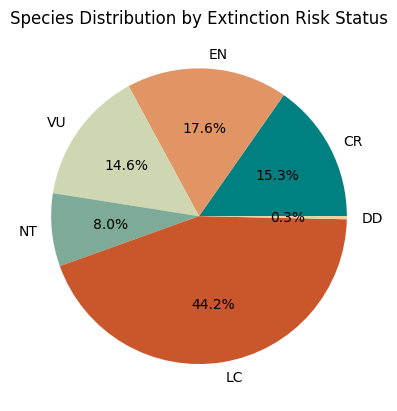

In [355]:
# Python library for data visualization
import matplotlib.pyplot as plt
# Define data
labels = 'CR', 'EN', 'VU', 'NT', 'LC', 'DD'
sizes = [46, 53, 44, 24, 133, 1]
# Hex codes for custom colors
colors = ['#008080', '#e19464', '#ced7b1', '#7eab98', '#ca562c', '#f1cf9e']
# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Species Distribution by Extinction Risk Status')
# Display pie chart
plt.show()

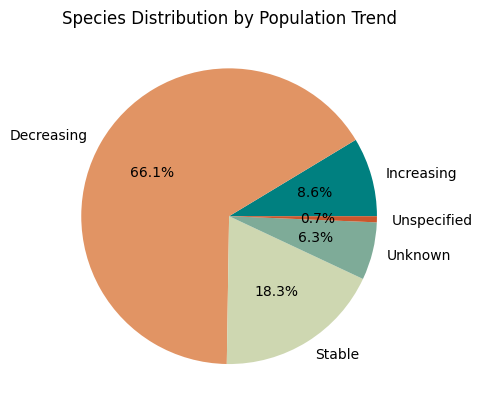

In [356]:
# Define data
labels = 'Increasing', 'Decreasing', 'Stable', 'Unknown', 'Unspecified'
sizes = [26, 199, 55, 19, 2]
# Hex codes for custom colors
colors = ['#008080', '#e19464', '#ced7b1', '#7eab98', '#ca562c']
# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Species Distribution by Population Trend')
# Display pie chart
plt.show()

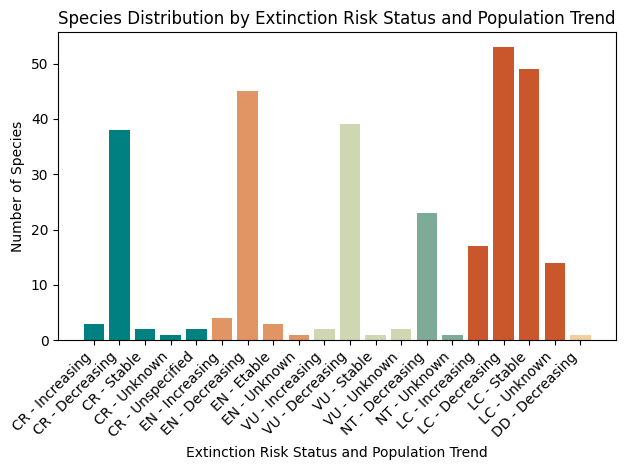

In [357]:
# Define data
risk_and_trend = ['CR - Increasing', 'CR - Decreasing', 'CR - Stable', 'CR - Unknown', 'CR - Unspecified', 
              'EN - Increasing', 'EN - Decreasing', 'EN - Etable', 'EN - Unknown',
              'VU - Increasing', 'VU - Decreasing', 'VU - Stable', 'VU - Unknown', 
              'NT - Decreasing', 'NT - Unknown', 
              'LC - Increasing', 'LC - Decreasing', 'LC - Stable', 'LC - Unknown', 
              'DD - Decreasing',]
values = [3, 38, 2, 1, 2, 4, 45, 3, 1, 2, 39, 1, 2, 23, 1, 17, 53, 49, 14, 1]
# Hex codes for custom colors
colors = ['#008080', '#008080', '#008080', '#008080', '#008080',
          '#e19464', '#e19464', '#e19464', '#e19464', 
          '#ced7b1', '#ced7b1', '#ced7b1', '#ced7b1', 
          '#7eab98', '#7eab98',
          '#ca562c', '#ca562c', '#ca562c', '#ca562c', 
          '#f1cf9e'
          ]
# Create bar chart
plt.bar(risk_and_trend, values, color=colors)
plt.xlabel('Extinction Risk Status and Population Trend')
plt.ylabel('Number of Species')
plt.title('Species Distribution by Extinction Risk Status and Population Trend')
# Adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display bar chart
plt.show()

# Summary and Discussion